# Ex - GroupBy

### Introduction:

GroupBy can be summarized as Split-Apply-Combine.

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

Check out this [Diagram](http://i.imgur.com/yjNkiwL.png)  
### Step 1. Import the necessary libraries

In [47]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

In [48]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'

### Step 3. Assign it to a variable called drinks.

In [49]:
drinks = pd.read_csv(filepath_or_buffer=url)

drinks.fillna(value="NA", inplace=True)
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


### Step 4. Which continent drinks more beer on average?

In [50]:
beer = drinks.sort_values(by='beer_servings', ascending=False)

beer.reset_index().query('country == "Spain"')

,index,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
12,160,Spain,284,157,112,10.0,EU


In [51]:
drinks.groupby(by='continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [52]:
df_g = drinks.groupby(by='continent')

In [53]:
eu = df_g.get_group('EU')

In [54]:
af = df_g.get_group('AF')

In [55]:
import matplotlib.pyplot as plt

Text(50, 25, 'ñ')

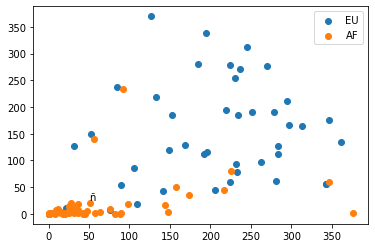

In [56]:
plt.scatter(x=eu.beer_servings,y=eu.wine_servings,label='EU')
plt.scatter(x=af.beer_servings,y=af.wine_servings,label='AF')

plt.legend()
plt.text(x=50,y=25,s='ñ')

In [57]:
import numpy
juanes = drinks.dropna().continent.unique()
juanes

array(['AS', 'EU', 'AF', 'NA', 'SA', 'OC'], dtype=object)

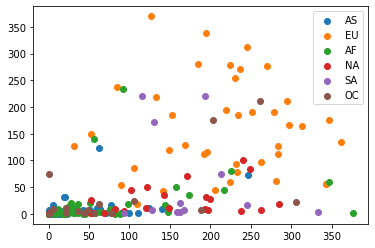

In [58]:
for juan in juanes:
    pepa = df_g.get_group(juan)
    plt.scatter(x=pepa.beer_servings,y=pepa.wine_servings,label=juan)
plt.legend()

In [60]:
drinks.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

### Step 5. For each continent print the statistics for wine consumption.

In [66]:
drinks.groupby('continent').wine_servings.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
NA,23.0,24.521739,28.266378,1.0,5.0,11.0,34.00,100.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


### Step 6. Print the mean alcohol consumption per continent for every column

In [67]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Step 7. Print the median alcohol consumption per continent for every column

In [68]:
drinks.groupby('continent').median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
NA,143.0,137.0,11.0,6.30
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [72]:
drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max'])

,mean,min,max
continent,,,
AF,16.339623,0,152
AS,60.840909,0,326
EU,132.555556,0,373
NA,165.739130,68,438
OC,58.437500,0,254
SA,114.750000,25,302
